In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart.csv')
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

# EDA

In [3]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [4]:
df.shape

(918, 12)

In [5]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [8]:
df.duplicated().sum()

0

<Axes: xlabel='HeartDisease'>

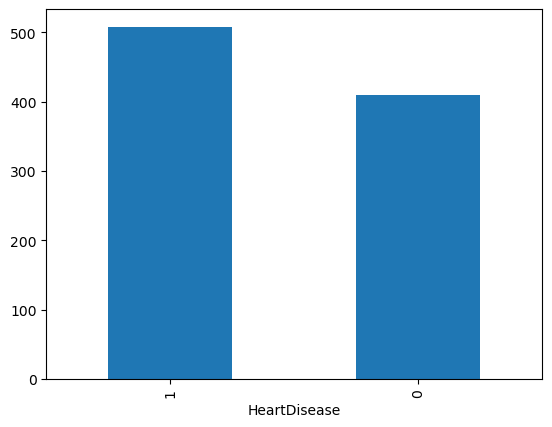

In [9]:
df['HeartDisease'].value_counts().plot(kind= 'bar')

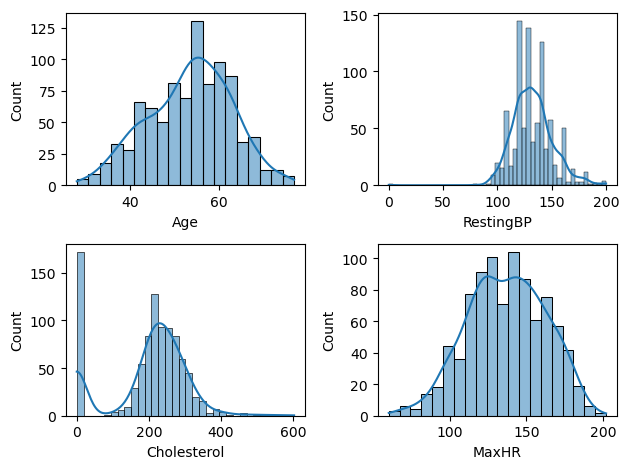

In [10]:
def ploting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde = True)

ploting('Age',1)
ploting('RestingBP',2)
ploting('Cholesterol',3)
ploting('MaxHR',4)

plt.tight_layout()
        

In [11]:
df['RestingBP'].value_counts()

RestingBP
120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: count, Length: 67, dtype: int64

In [12]:
df['Cholesterol'].value_counts()

Cholesterol
0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: count, Length: 222, dtype: int64

In [13]:
ch_mean = df.loc[df['Cholesterol'] != 0 ,'Cholesterol'].mean()

In [14]:
df['Cholesterol'] = df['Cholesterol'].replace(0,ch_mean)
df['Cholesterol'] = df['Cholesterol'].round(2)


In [15]:
re_bp_mean = df.loc[df['RestingBP'] != 0 , 'RestingBP'].mean()
df['RestingBP'] = df['RestingBP'].replace(0,re_bp_mean)
df['RestingBP'] = df['RestingBP'].round(2)

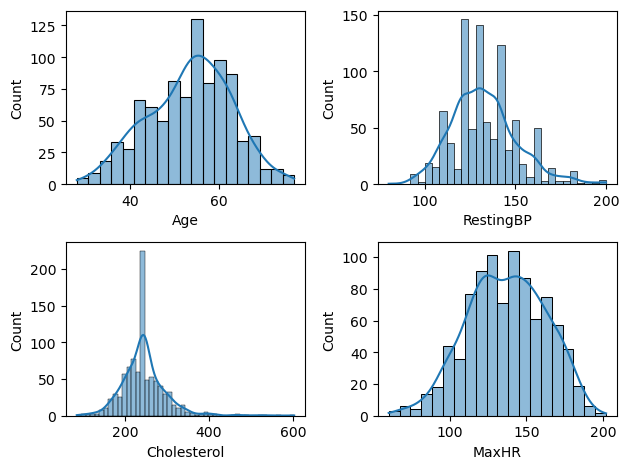

In [16]:
def ploting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde = True)

ploting('Age',1)
ploting('RestingBP',2)
ploting('Cholesterol',3)
ploting('MaxHR',4)

plt.tight_layout()

In [17]:
pip install sheryanalysis==0.1.0

In [18]:
import sheryanalysis as sh
sh.analyze(df)


üîç Basic Analysis Report
------------------------------------------------------------
üìè Shape: (918, 12)
üß± Columns: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

‚úÖ No null values found

üî† Categorical Columns: ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

üî¢ Numerical Columns: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


{'shape': (918, 12),
 'columns': ['Age',
  'Sex',
  'ChestPainType',
  'RestingBP',
  'Cholesterol',
  'FastingBS',
  'RestingECG',
  'MaxHR',
  'ExerciseAngina',
  'Oldpeak',
  'ST_Slope',
  'HeartDisease'],
 'dtypes': {'Age': dtype('int64'),
  'Sex': dtype('O'),
  'ChestPainType': dtype('O'),
  'RestingBP': dtype('float64'),
  'Cholesterol': dtype('float64'),
  'FastingBS': dtype('int64'),
  'RestingECG': dtype('O'),
  'MaxHR': dtype('int64'),
  'ExerciseAngina': dtype('O'),
  'Oldpeak': dtype('float64'),
  'ST_Slope': dtype('O'),
  'HeartDisease': dtype('int64')},
 'null_counts': {'Age': 0,
  'Sex': 0,
  'ChestPainType': 0,
  'RestingBP': 0,
  'Cholesterol': 0,
  'FastingBS': 0,
  'RestingECG': 0,
  'MaxHR': 0,
  'ExerciseAngina': 0,
  'Oldpeak': 0,
  'ST_Slope': 0,
  'HeartDisease': 0},
 'total_rows': 918,
 'column_types': {'categorical': ['Sex',
   'ChestPainType',
   'FastingBS',
   'RestingECG',
   'ExerciseAngina',
   'ST_Slope',
   'HeartDisease'],
  'numerical': ['Age', 'Rest

<Axes: xlabel='Sex', ylabel='count'>

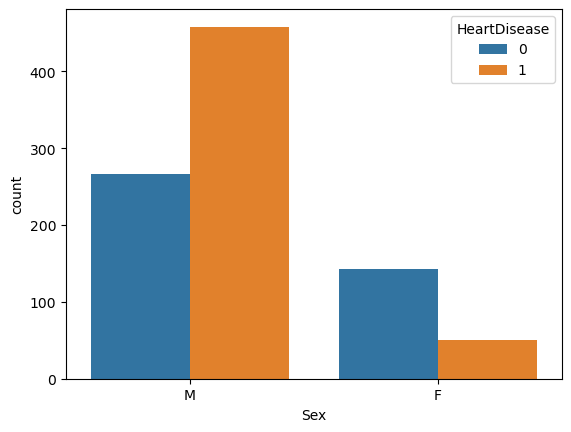

In [19]:
sns.countplot(x = df['Sex'],hue = df['HeartDisease'])

<Axes: xlabel='ChestPainType', ylabel='count'>

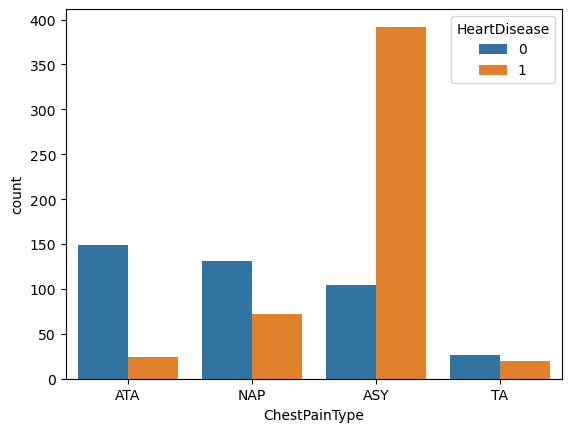

In [20]:
sns.countplot(x = df['ChestPainType'],hue = df['HeartDisease'])

<Axes: xlabel='FastingBS', ylabel='count'>

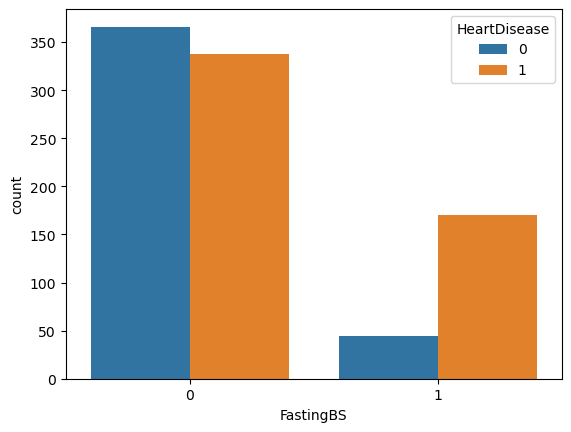

In [21]:
sns.countplot(x = df['FastingBS'],hue = df['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

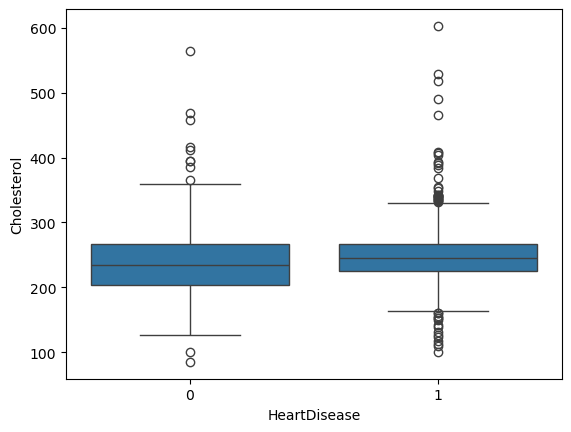

In [22]:
sns.boxplot( x = 'HeartDisease',y = 'Cholesterol',data = df)

<Axes: xlabel='HeartDisease', ylabel='Age'>

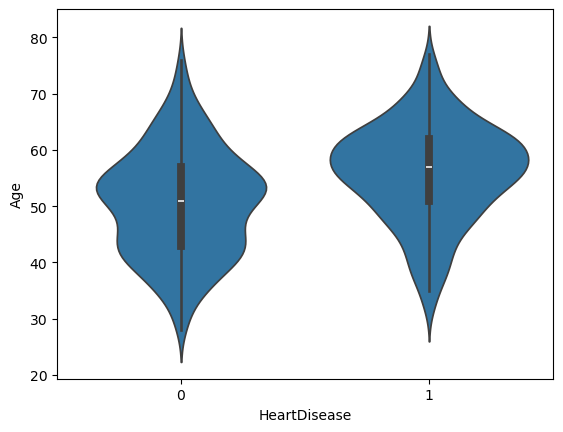

In [23]:
sns.violinplot(x = 'HeartDisease',y = 'Age',data = df)

<Axes: >

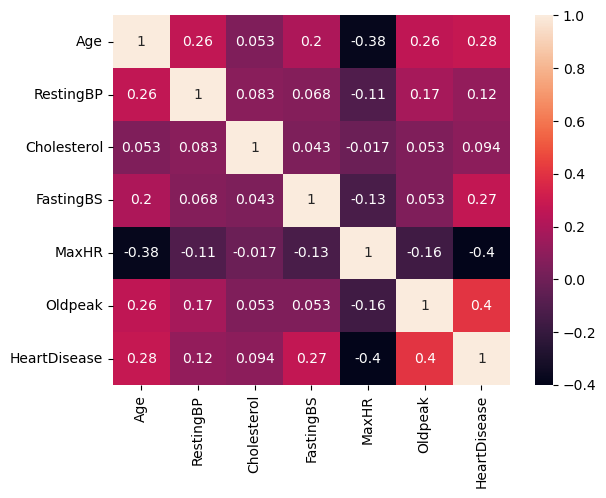

In [24]:
sns.heatmap(df.corr(numeric_only = True),annot = True)

# data preprocessing

In [25]:
df_encode = pd.get_dummies(df)
df_encode = df_encode.astype(int)

In [26]:
df_encode

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0     40        140          289          0    172        0             0   
1     49        160          180          0    156        1             1   
2     37        130          283          0     98        0             0   
3     48        138          214          0    108        1             1   
4     54        150          195          0    122        0             0   
..   ...        ...          ...        ...    ...      ...           ...   
913   45        110          264          0    132        1             1   
914   68        144          193          1    141        3             1   
915   57        130          131          0    115        1             1   
916   57        130          236          0    174        0             1   
917   38        138          175          0    173        0             0   

     Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainType_NAP  \
0        0      1                  0  ...                  0   
1        1      0                  0  ...                  1   
2        0      1                  0  ...                  0   
3        1      0                  1  ...                  0   
4        0      1                  0  ...                  1   
..     ...    ...                ...  ...                ...   
913      0      1                  0  ...                  0   
914      0      1                  1  ...                  0   
915      0      1                  1  ...                  0   
916      1      0                  0  ...                  0   
917      0      1                  0  ...                  1   

     ChestPainType_TA  RestingECG_LVH  RestingECG_Normal  RestingECG_ST  \
0                   0               0                  1              0   
1                   0               0                  1              0   
2                   0               0                  0              1   
3                   0               0                  1              0   
4                   0               0                  1              0   
..                ...             ...                ...            ...   
913                 1               0                  1              0   
914                 0               0                  1              0   
915                 0               0                  1              0   
916                 0               1                  0              0   
917                 0               0                  1              0   

     ExerciseAngina_N  ExerciseAngina_Y  ST_Slope_Down  ST_Slope_Flat  \
0                   1                 0              0              0   
1                   1                 0              0              1   
2                   1                 0              0              0   
3                   0                 1              0              1   
4                   1                 0              0              0   
..                ...               ...            ...            ...   
913                 1                 0              0              1   
914                 1                 0              0              1   
915                 0                 1              0              1   
916                 1                 0              0              1   
917                 1                 0              0              0   

     ST_Slope_Up  
0              1  
1              0  
2              1  
3              0  
4              1  
..           ...  
913            0  
914            0  
915            0  
916            0  
917            1  

[918 rows x 21 columns]

In [32]:
df_encode.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [37]:
X = df_encode.drop('HeartDisease' ,axis = 1)
y = df_encode['HeartDisease']

In [39]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

In [40]:
scaler = StandardScaler()
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled =scaler.fit_transform(X_test)

In [46]:
models = {
    'Logistic Regression':LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'Naive Bayes':GaussianNB(),
    'Decission Tree':DecisionTreeClassifier(),
    'SVM (RBF Kernal)':SVC(probability = True)
    
}

In [47]:
result = []

In [48]:
for name , model in models.items():
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    result.append({
        'model' :name,
        'accuracy': round(acc,4),
        'f1_score': round(f1,4)
    })

In [50]:
result

[{'model': 'Logistic Regression', 'accuracy': 0.875, 'f1_score': 0.89},
 {'model': 'KNN', 'accuracy': 0.8533, 'f1_score': 0.8708},
 {'model': 'Naive Bayes', 'accuracy': 0.8315, 'f1_score': 0.8458},
 {'model': 'Decission Tree', 'accuracy': 0.8043, 'f1_score': 0.8218},
 {'model': 'SVM (RBF Kernal)', 'accuracy': 0.8641, 'f1_score': 0.8804}]

In [51]:
import joblib
joblib.dump(models['Logistic Regression'],'Logistic Regression_heart.pkl')
joblib.dump(scaler,'scaler.pkl')
joblib.dump(X.columns.tolist(),'columns.pkl')

['columns.pkl']